In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
print(tf.__version__)

2.10.0


In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

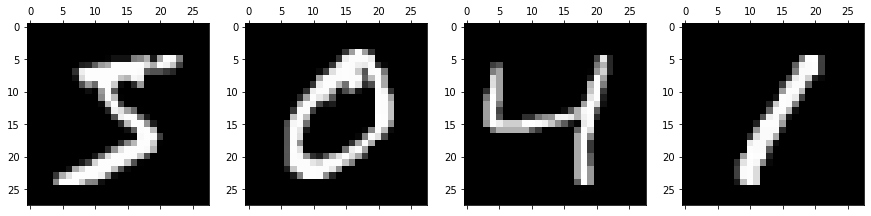

In [9]:
plt.gray()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
for i in range(4):
    axes[i].matshow(X_train[i])

In [10]:
y_train[2]

4

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# Now lets flatten our Training Dataset, because our image is 28x28 = 784 so we want 784 neurons and for that we need to flatten it

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28) 

In [14]:
X_train_flattened[0]    # now it has converted into single dimensional array...

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
# now let's create a simple neural network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])    # sequential means getting a stack of layers in my neural network 
      # dense means all the neurons in 1st layer are connected with every other neurons in 2nd layer
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimizers allow us to train our model efficiently 

model.fit(X_train_flattened, y_train, epochs=5)   # where training will be happen
# epochs is the number of iterations the neural network is going to train

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5139 - accuracy: 0.8432
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1770 - accuracy: 0.8778
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6407 - accuracy: 0.8858
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4757 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5583 - accuracy: 0.8844


In [16]:
# now the accuracy we got is fine but if we want more accurate, then we will scale our values of X_train and X_test

X_train = X_train / 255    # to get values in between 0 and 1
X_test = X_test / 255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28) 

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])    # sequential means getting a stack of layers in my neural network 
      # dense means all the neurons in 1st layer are connected with every other neurons in 2nd layer
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimizers allow us to train our model efficiently 

model.fit(X_train_flattened, y_train, epochs=5)   # where training will be happen
# epochs is the number of iterations the neural network is going to train

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9257


In [20]:
# which means 92% of time our model will make accurate prediction

**Now let's try to evaluate the accuracy on Test Dataset**

In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2675 - accuracy: 0.9283


[0.2675071954727173, 0.9283000230789185]

<Figure size 432x288 with 0 Axes>

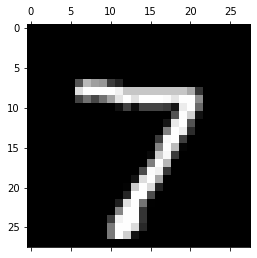

In [22]:
plt.gray()
plt.matshow(X_test[0])

In [23]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

# Hence it's predicted perfect!

313/313 [==============================] - 0s 1ms/step


7

In [24]:
y_test[:5]    # truth data

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]    # predicted data

[7, 2, 1, 0, 4]

In [26]:
# Now to see How our Prediction look like, we will use Confusion Matrix!
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [27]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    1,    0,    6,    4,    3,    1,    0],
       [   0, 1111,    4,    1,    0,    1,    4,    2,   12,    0],
       [   3,    9,  932,   17,    6,    5,   10,    9,   37,    4],
       [   4,    0,   21,  905,    0,   33,    2,   12,   25,    8],
       [   2,    1,    5,    1,  901,    0,    8,    5,    9,   50],
       [   8,    3,    5,   24,    6,  796,    8,    5,   30,    7],
       [  13,    3,    8,    1,    7,   16,  905,    2,    3,    0],
       [   1,    5,   22,    6,    2,    0,    0,  962,    2,   28],
       [   6,    7,    7,   16,    9,   27,    8,   11,  875,    8],
       [  10,    6,    1,    8,   14,    7,    0,   21,    9,  933]])>

Text(69.0, 0.5, 'Truth')

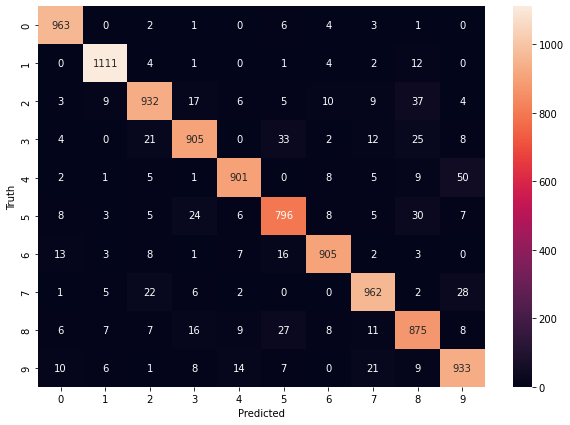

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Now Let's add Hidden Layers(which generally improves the performance)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),    # 1 Hidden Layer
    keras.layers.Dense(10, activation='sigmoid')
    
])    # sequential means getting a stack of layers in my neural network 
      # dense means all the neurons in 1st layer are connected with every other neurons in 2nd layer
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimizers allow us to train our model efficiently 

model.fit(X_train_flattened, y_train, epochs=5)   # where training will be happen
# epochs is the number of iterations the neural network is going to train

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9844


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9752


[0.08545778691768646, 0.9751999974250793]

In [31]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

313/313 [==============================] - 0s 1ms/step


7

In [32]:
y_test[:5]    # truth data

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]    # predicted data

[7, 2, 1, 0, 4]

In [34]:
# Now let's see our How our Prediction looks by again plotting Confusion Matrix Using Heat Map...
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [35]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    3,    2,    2,    2,    1,    3,    1,    2],
       [   0, 1123,    5,    0,    0,    1,    2,    2,    2,    0],
       [   4,    2, 1018,    0,    2,    0,    1,    4,    1,    0],
       [   0,    0,   12,  979,    0,    3,    0,    8,    3,    5],
       [   0,    0,    7,    0,  969,    0,    0,    2,    0,    4],
       [   3,    0,    0,   12,    1,  869,    2,    0,    4,    1],
       [   7,    3,    1,    1,    5,    7,  931,    0,    3,    0],
       [   1,    3,   16,    2,    0,    0,    0, 1005,    1,    0],
       [   4,    1,   10,    9,    8,    6,    1,    5,  926,    4],
       [   2,    3,    0,    4,   14,    2,    0,   16,    0,  968]])>

Text(69.0, 0.5, 'Truth')

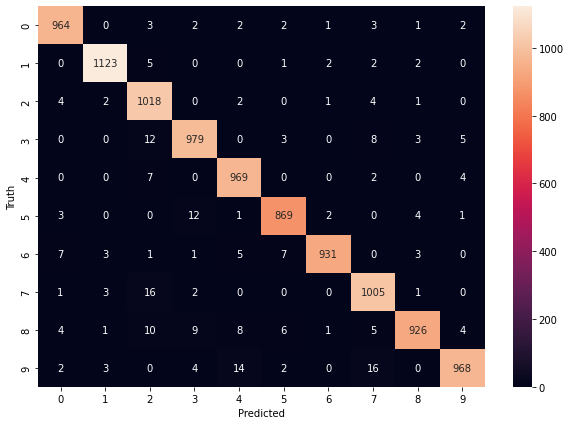

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
# Over